# Emilo Gopaul 
## 816007034
### COMP 3610 Assignment 4
# Time Series Analysis
## Literature Review

The necessity to determine a reliable forecast of energy and specifically electricity has been explored recently, as it has been dubbed as a critical means for the deciding the verdicts that would influence operating costs, profits and overall efficiency of the production of electricity (Hosein and Hosein 2017; Mirasgedis et al 2006) The study by Hosein (2017) explored how using Deep Neural Networks (DNN) are superior to traditional methods, while exploring short term load forecasting for electricity using data collected over a year for a tropical country. Deep neural network is an artificial neural network with varying layers among the input and output layers. This achieves complex functions by using simple nonlinear modules to transform the level given to a higher level (Engineering Science Reference 2019). The 2017 study compared deep architectures which included Stacked Autoencoders, Convolutional Neural Networks, Recurrent Neural Networks and Long-Short-Term memory with traditional methods of moving averages, regression trees and support vector regressions.

 The year’s data utilized included hourly samples; divided into 65%, 15% and 20% and variable such as day of the week, hour of day, holiday, temperature and humidity.  The traditional algorithms used included Weighted Moving Average (WMA), Multiple Linear Regression (MLR), quadratic (MQR), Regression Tree (RT), Support Vector Regression (SVR) and Multilayer Perception (MLP). The DNN used was the Deep Neural Network without pretraining (DNN-W), DNN with pretraining used in Stacked Autoencoders, Recurrent Neural Networks (RNN) and Long Short Term Memory (RRN-LSTM). The study determined that the traditional method MLR had the poorest performance, and the RT had the best among the traditional method, where it was seen that having a node in the RT that determined the time of the day improved the accuracy. Notably, the run time for these were short. DNN has a longer running time, and the research was limited to 200 – 400 epocs. However, a lower error (MAPE) was seen with the higher epocs. Multilayer perception did not perform the worst but was in the lower half when accuracy was considered. DDN-W performed the best in the 200 epocs, however DNN-SA had a lower error, and was the best when the epoc was increased to 400. All data showed that DNN outperformed traditional methods, however had the disadvantage of requiring more time. Therefore, when choosing a model, time available and the level of accuracy required can be used to determine the appropriate model. DNNs determined more accurate predictions when given more data (ie weekdays vs weekends).
 
   Electricity providers are interested in the change of electrical loads this can be determined using the Mean Percentage Error (MPE). The MPE would tell that a model with a positive value” under-predicts” the load while a negative value “over-predicts” the actual value and they can then adjust their operations accordingly. It was found that the traditional methods over predict and DNNs under predicts the actual loads. Using the results from STLF (MAPE and MPE), a company can now accurately predict upcoming load. This would mean that a power generating company, can now produce energy at a much more precise amount to prevent wastage of excess energy. In conclusion this literature review showed that deep learning has been successful in other applications but has not been demonstrated in the power sector. The results indicated that the DNN has a greater accuracy than traditional methods however DNNs suffer long computational times but are still preferable. Electrical companies can use the information gathered to make precise decisions on pricing and projected load, among others.
   
###### References:

Engineering Science Reference, 2019. Deep Learning and Neural Networks: Concepts, Methodologies, Tools, and Applications. Hershey.
Hosein, Stefan and Hosein, Patrick. “Load Forecasting Using Deep Neural Networks.” Institute of Electrical and Electronics Engineers, 2017.
Mirasgedis, S, Y Sarafidis, E Georgopoulou, D Lalas, M Moschovits, F Karagiannis, and D Papakonstantinou. “Models for Mid-Term Electricity Demand Forecasting Incorporating Weather Influences.” Energy 31, no. 2-3 (2006): 208–27.


## Forecasting

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

from sklearn.metrics import mean_squared_error
from math import sqrt

In [322]:
dw = pd.read_csv('weather_daily_darksky.csv')
ed = pd.read_csv('energydata.csv')

In [3]:
dw.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [4]:
ed.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000048,2011-12-08,0.1070,0.159217,0.576,23,0.118021,3.662,0.087
1,MAC000048,2011-12-09,0.0920,0.125750,0.570,48,0.089277,6.036,0.087
2,MAC000048,2011-12-10,0.0925,0.209646,1.322,48,0.288224,10.063,0.087
3,MAC000048,2011-12-11,0.1160,0.245187,2.001,48,0.325140,11.769,0.088
4,MAC000048,2011-12-12,0.0950,0.123188,0.326,48,0.057947,5.913,0.087


In [225]:
df1 = dw[["time","temperatureHigh"]]
df2 = ed[["day","energy_sum"]]

In [208]:
df1.head()

,time,temperatureHigh
0,2011-11-11 00:00:00,10.87
1,2011-12-11 00:00:00,8.59
2,2011-12-27 00:00:00,10.33
3,2011-12-02 00:00:00,7.36
4,2011-12-24 00:00:00,7.93


In [106]:
df1['time'].value_counts()

2012-05-17 23:00:00    1
2013-12-23 00:00:00    1
2013-03-04 00:00:00    1
2013-09-17 23:00:00    1
2011-12-08 00:00:00    1
2013-04-20 23:00:00    1
2012-07-04 23:00:00    1
2012-07-06 23:00:00    1
2012-02-07 00:00:00    1
2013-03-02 00:00:00    1
2014-03-08 00:00:00    1
2012-08-14 23:00:00    1
2012-10-30 00:00:00    1
2012-02-09 00:00:00    1
2013-12-17 00:00:00    1
2013-02-08 00:00:00    1
2014-02-09 00:00:00    1
2012-02-26 00:00:00    1
2013-06-28 23:00:00    1
2012-11-17 00:00:00    1
2014-02-01 00:00:00    1
2013-02-23 00:00:00    1
2013-07-28 23:00:00    1
2013-05-16 23:00:00    1
2013-07-04 23:00:00    1
2012-02-06 00:00:00    1
2012-12-06 00:00:00    1
2013-06-06 23:00:00    1
2012-12-08 00:00:00    1
2013-06-19 23:00:00    1
                      ..
2012-09-05 23:00:00    1
2013-06-05 23:00:00    1
2013-12-05 00:00:00    1
2013-10-01 23:00:00    1
2012-11-03 00:00:00    1
2013-09-04 23:00:00    1
2012-04-03 23:00:00    1
2012-08-16 23:00:00    1
2014-01-10 00:00:00    1


In [209]:
df2.head()

,day,energy_sum
0,2011-12-08,3.662
1,2011-12-09,6.036
2,2011-12-10,10.063
3,2011-12-11,11.769
4,2011-12-12,5.913


In [113]:
df2['day'].value_counts()

2012-12-19    50
2012-10-31    50
2012-12-11    50
2012-10-26    50
2013-01-09    50
2012-12-08    50
2012-11-03    50
2012-12-05    50
2012-10-15    50
2012-12-25    50
2013-01-02    50
2012-10-13    50
2012-12-16    50
2013-01-06    50
2012-12-26    50
2012-10-19    50
2013-01-03    50
2012-12-29    50
2013-01-12    50
2012-11-21    50
2013-01-13    50
2012-12-06    50
2013-01-07    50
2012-11-12    50
2013-01-19    50
2012-11-20    50
2012-10-11    50
2012-12-09    50
2012-12-20    50
2012-11-06    50
              ..
2011-12-23    28
2011-12-22    28
2011-12-20    28
2011-12-26    28
2011-12-19    22
2011-12-17    17
2011-12-18    17
2011-12-16     9
2011-12-14     7
2011-12-15     7
2011-12-13     7
2011-12-12     7
2011-12-10     7
2011-12-11     7
2011-12-09     4
2011-12-08     3
2011-11-25     2
2011-11-27     2
2011-12-01     2
2011-12-03     2
2011-11-26     2
2011-11-28     2
2011-11-30     2
2011-12-04     2
2011-12-02     2
2011-12-07     2
2011-12-06     2
2011-12-05    

It would have been easy to drop all the rows with the same day, but as we can see, we will be losing a lot of data. However, it was requested that there is only one row for a given date, therefore we will find the mean of the 'energy_sum' rows with duplicate days and use that value.

In [227]:
df2 = df2.groupby('day').mean().reset_index()

In [115]:
df2['day'].value_counts()

2012-05-08    1
2011-12-05    1
2011-12-24    1
2013-05-02    1
2013-05-11    1
2013-05-18    1
2014-01-11    1
2013-07-26    1
2013-07-09    1
2012-02-12    1
2013-07-05    1
2013-10-10    1
2013-08-28    1
2013-10-18    1
2013-07-30    1
2012-09-25    1
2013-07-18    1
2013-08-03    1
2013-11-26    1
2012-08-18    1
2013-04-26    1
2013-03-19    1
2013-10-30    1
2011-11-29    1
2012-07-28    1
2012-08-26    1
2013-09-04    1
2014-01-02    1
2012-08-25    1
2012-06-21    1
             ..
2012-01-18    1
2013-10-23    1
2012-08-27    1
2012-08-07    1
2013-07-31    1
2012-01-07    1
2012-01-12    1
2013-09-09    1
2012-04-19    1
2012-03-31    1
2012-03-15    1
2012-07-09    1
2012-08-14    1
2012-11-08    1
2012-05-14    1
2012-10-27    1
2012-10-16    1
2013-11-12    1
2012-04-05    1
2012-10-26    1
2012-01-23    1
2012-08-12    1
2013-03-25    1
2013-10-19    1
2012-07-14    1
2013-02-19    1
2013-01-24    1
2012-05-02    1
2012-04-13    1
2012-06-02    1
Name: day, Length: 828, 

In [228]:
df1.time = pd.to_datetime(df1.time)
df1.set_index('time', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [229]:
df1.head()

,temperatureHigh
time,
2011-11-11,10.87
2011-12-11,8.59
2011-12-27,10.33
2011-12-02,7.36
2011-12-24,7.93


In [230]:
df2.day = pd.to_datetime(df2.day)
df2.set_index('day', inplace=True)

In [8]:
df2.head()

,energy_sum
day,
2011-11-24,5.2130
2011-11-25,6.0235
2011-11-26,7.7235
2011-11-27,8.3955
2011-11-28,7.7400


In [231]:
df1.shape

(882, 1)

In [232]:
df2.shape

(828, 1)

So we have succeeded in removing the duplicate rows, however the shape of the 2 dataframes do not match. We will see if this causes a problem later on.

### Question 1

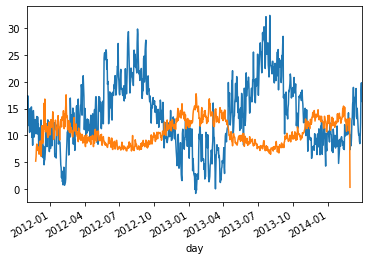

In [132]:
fig = plt.figure()
ax = plt.subplot(111)
df1['temperatureHigh'].plot(ax=ax)
df2['energy_sum'].plot(ax=ax)

Text(0.5, 0, 'Year')

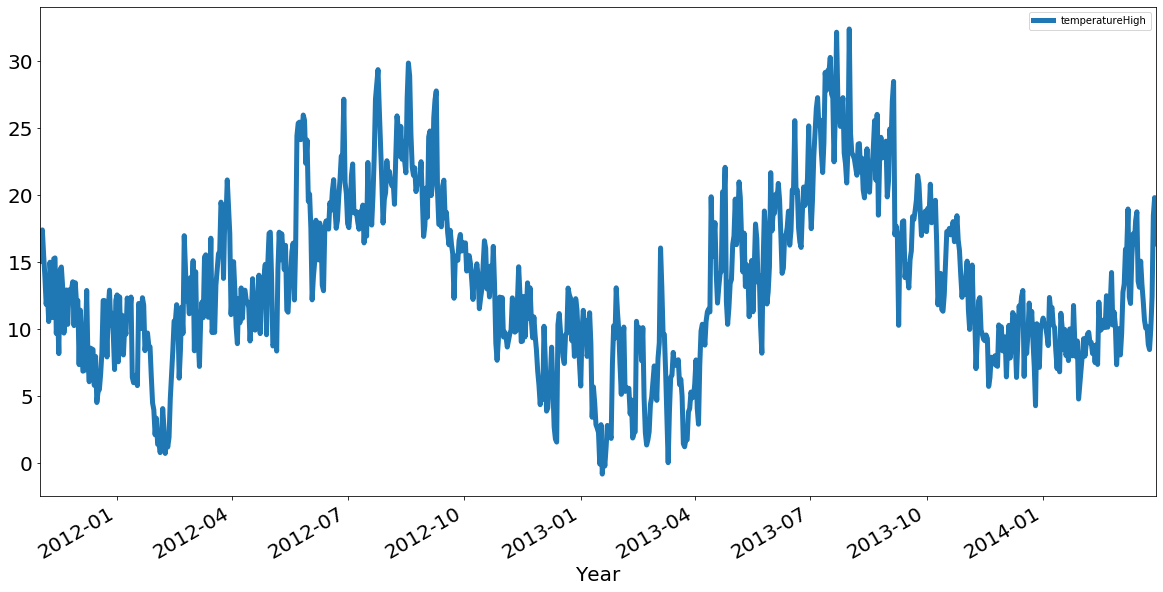

In [235]:
df1[['temperatureHigh']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Time')

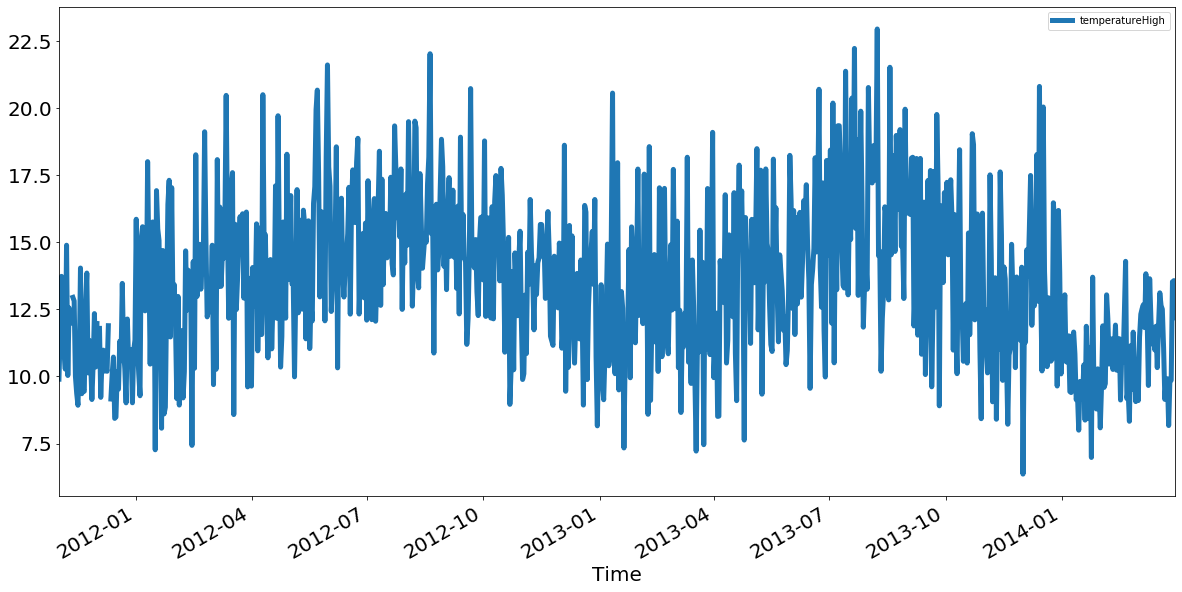

In [62]:
tHigh = df1[['temperatureHigh']]
tHigh.rolling(5).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

After performing the rolling average function, the trend seems to be linear and somewhat periodic.

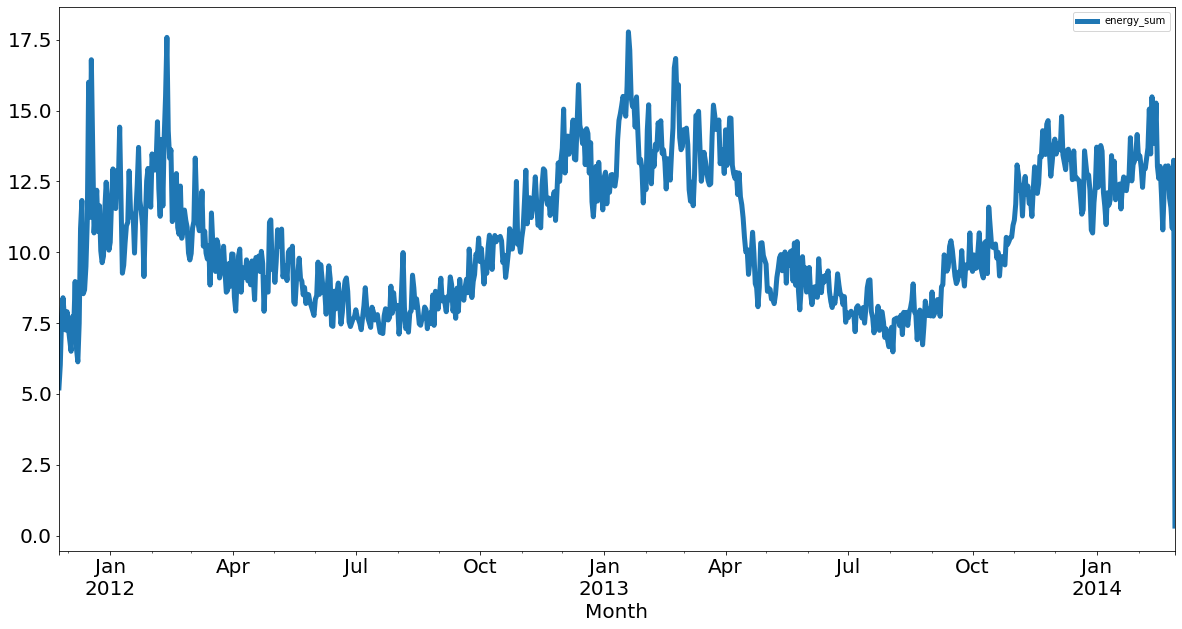

In [130]:
df2[['energy_sum']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20);

Text(0.5, 0, 'Time')

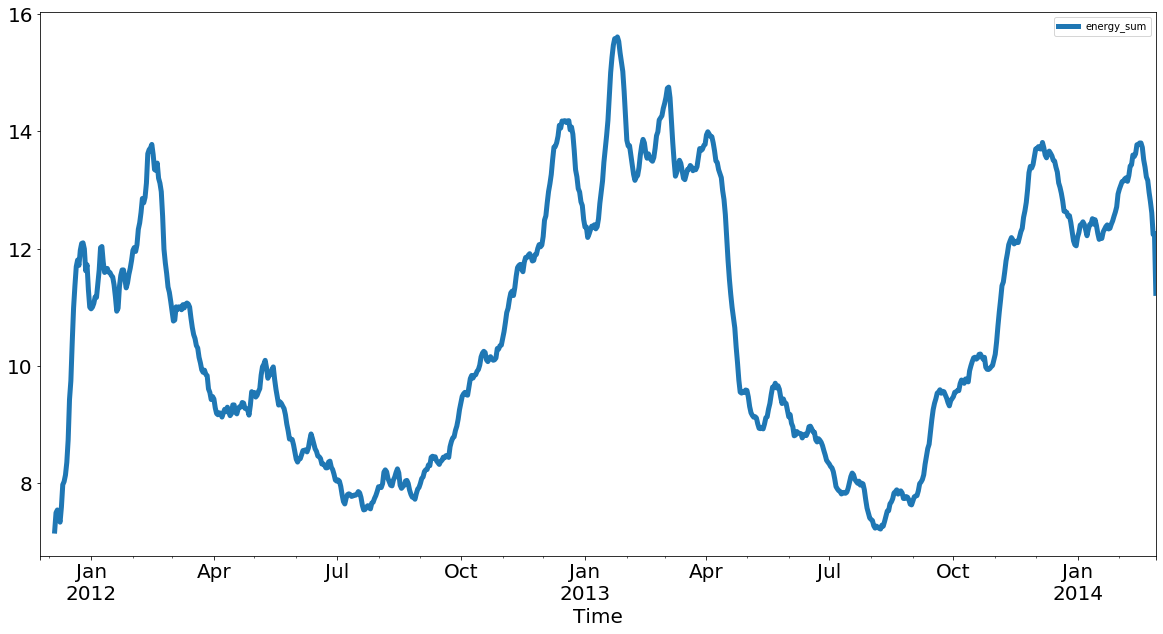

In [115]:
energy_sum = df2[['energy_sum']]
energy_sum.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Time', fontsize=20)

The trend for the energy seems to be non-linear but periodic.

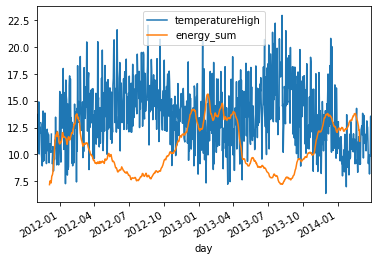

In [303]:
fig = plt.figure()
ax = plt.subplot(111)
tHigh.rolling(5).mean().plot(ax=ax)
energy_sum.rolling(12).mean().plot(ax=ax)

Both trends seem to have an inverse relation as we can see that whenever the temperature levels are high, the energy levels are low and whenever the energy levels are high, the temperature levels tend to drop a little. A loose deduction might be that whenever temperature levels are high, energy consumption will be lower than usual.

### Question 2.

Text(0.5, 0, 'Day')

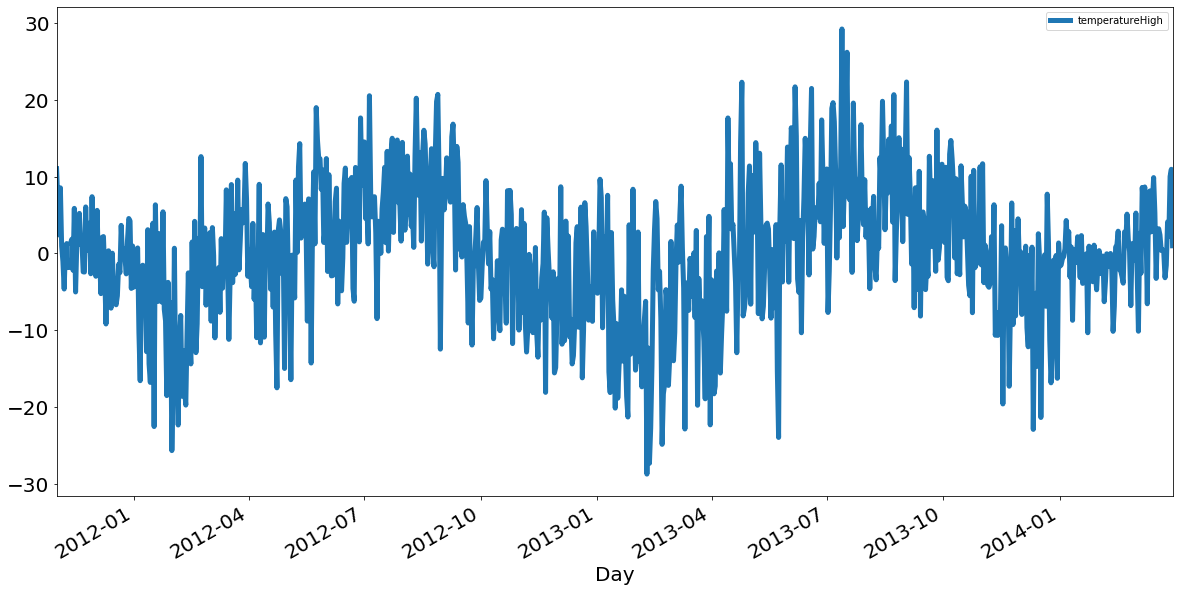

In [113]:
tHigh.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Day', fontsize=20)

The seasonal pattern is difficult to interpret from the graph, however, there seems to be a dip to almost -25% around the third month of each year. The values tend to increase by 20%-30% around the 8th or 9th month.

Text(0.5, 0, 'Month')

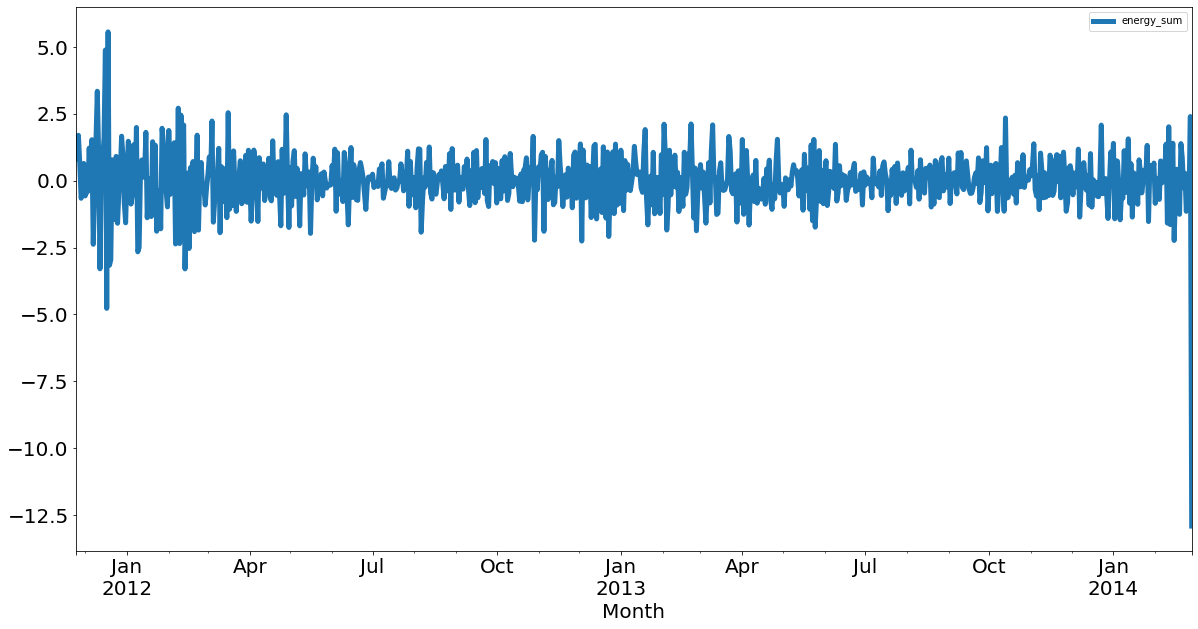

In [117]:
energy_sum.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20)

The energy values seem to almost the same for each month period, it appears that there are no seasonal trends for this column.

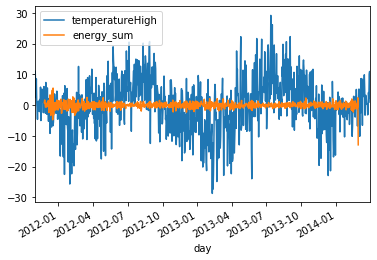

In [297]:
fig = plt.figure()
ax = plt.subplot(111)
tHigh.diff().plot(ax=ax)
energy_sum.diff().plot(ax=ax)

As we can see again, the energy level does not seem to be affected by the temperature levels. Hence, there is no relation.

### Question 3

In [9]:
temp = df1[['temperatureHigh']]
temp['temperatureHigh'] = temp['temperatureHigh'].astype(np.float64)

In [10]:
train = temp[temp.index.year < 2014]
test = temp[temp.index.year == 2014]

In [59]:
y_hat_avg = test.copy()
y_hat_avg['SES'] = temp.ewm(ignore_na=False,span=5,min_periods=0,adjust=True).mean()

In [64]:
rms = sqrt(mean_squared_error(test, y_hat_avg['SES']))
print(rms)

2.2370010509251017


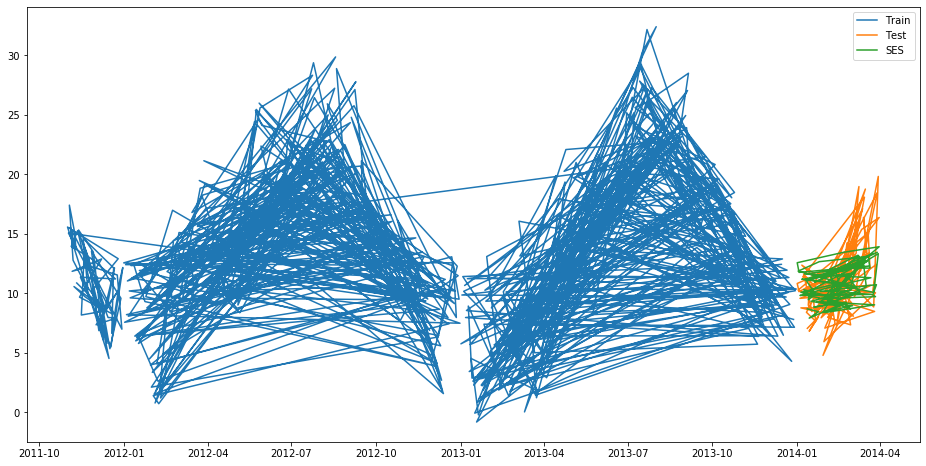

In [66]:
plt.figure(figsize=(16,8))
plt.plot(train['temperatureHigh'], label='Train')
plt.plot(test['temperatureHigh'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

### Question 4

In [47]:
energy = df2[['energy_sum']]
energy['energy_sum'] = energy['energy_sum'].astype(np.float64)

In [48]:
train1 = energy[energy.index.year < 2014]
test1 = energy[energy.index.year == 2014]

In [60]:
x_hat_avg = test1.copy()
x_hat_avg['SES'] = temp.ewm(ignore_na=False,span=5,min_periods=0,adjust=True).mean()

In [65]:
rms = sqrt(mean_squared_error(test1, x_hat_avg['SES']))
print(rms)

3.1499137692086276


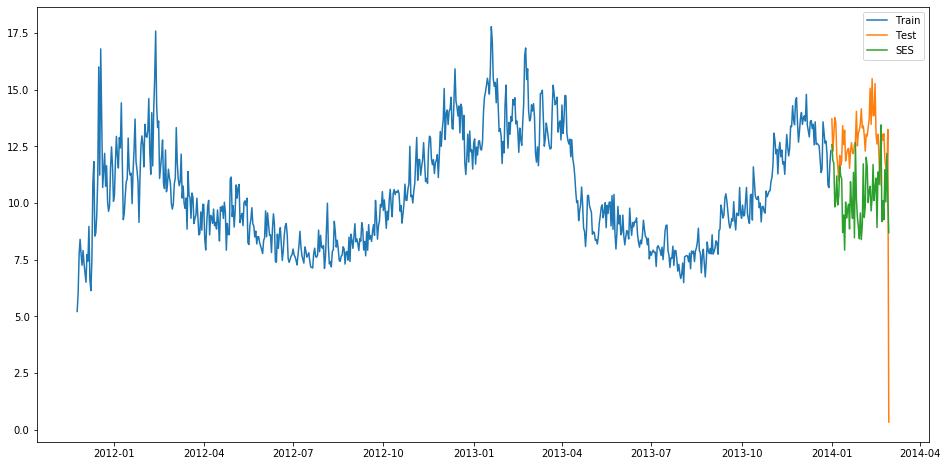

In [67]:
plt.figure(figsize=(16,8))
plt.plot(train1['energy_sum'], label='Train')
plt.plot(test1['energy_sum'], label='Test')
plt.plot(x_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

### Question 5.
#### Note:
Honestly, I was unsure which datasets to combine as the beginning of the "Forecasting" section said that we are only analyzing the two specified columns, hence when you asked to combine the initial datasets, I interpreted it as df1 and df2 which consists of the two columns we were asked to analyze as opposed to the ed and dw datasets. I do hope that if i misinterpreted the question that my reasoning is sufficient to obtain the necessary marks or that i can be graded under the assumption that the correct datasets were chosen.

In [73]:
df1.head()

,temperatureHigh
time,
2011-11-11,10.87
2011-12-11,8.59
2011-12-27,10.33
2011-12-02,7.36
2011-12-24,7.93


In [74]:
df2.head()

,energy_sum
day,
2011-11-24,5.2130
2011-11-25,6.0235
2011-11-26,7.7235
2011-11-27,8.3955
2011-11-28,7.7400


In [96]:
df = pd.DataFrame.join(df1,df2, on = df1.index)

In [98]:
df.head()

,temperatureHigh,energy_sum
time,,
2011-11-11,10.87,NaN
2011-12-11,8.59,11.828143
2011-12-27,10.33,9.862357
2011-12-02,7.36,6.900000
2011-12-24,7.93,11.643286


I decided to join by the index of df1 as there were more rows of data in this dataframe, hence this means that we would have more data to plot while minimizing the data lost from the join. 

### Question 6.

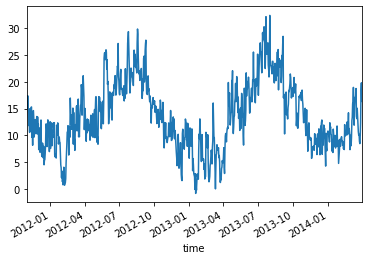

In [101]:
df['temperatureHigh'].plot()

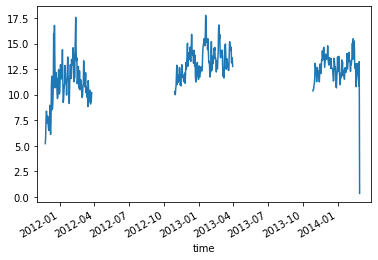

In [102]:
df['energy_sum'].plot()

### Question 7

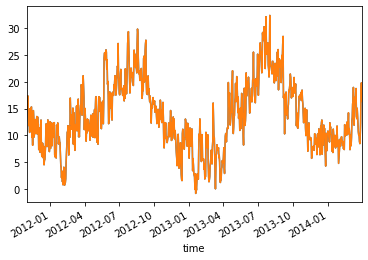

In [305]:
fig = plt.figure()
ax = plt.subplot(111)
df['temperatureHigh'].plot(ax=ax)
df1['temperatureHigh'].plot(ax=ax)

We can see that there is no difference with regards to the temperature high column.

However, from the energy_sum column, we can see that a chunk of data is missing, this is due to the joining of the two datasets to form a new one

## Prediction
### Part 1

In [122]:
mean = np.mean(df['energy_sum'])

In [144]:
df['energy_sum'] = df['energy_sum'].fillna(mean)

In [157]:
mean1 = np.mean(df['energy_sum'])
mean1

12.366619531411425

In [154]:
new = []

for i in df['energy_sum']:
    if i > mean1:
        new.append(1)
    else:
        new.append(0)

In [163]:
df['Target'] = new

In [169]:
df.head()

,temperatureHigh,energy_sum,Target
time,,,
2011-11-11,10.87,12.366620,1
2011-12-11,8.59,11.828143,0
2011-12-27,10.33,9.862357,0
2011-12-02,7.36,6.900000,0
2011-12-24,7.93,11.643286,0


The threshold value i chose was the *mean* of the energy_sum values as this is usually a good threshold to use.

### Part 2.

In [172]:
training = df[df.index.year < 2014]
testing = df[df.index.year == 2014]

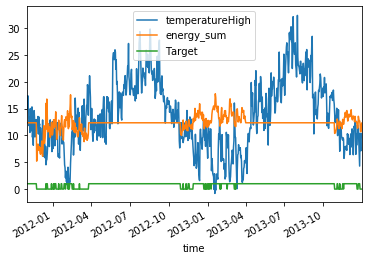

In [218]:
training.plot()

### Part 3.

In [219]:
inputs = training.drop(["Target","temperatureHigh"], axis = 1)
x = inputs.values

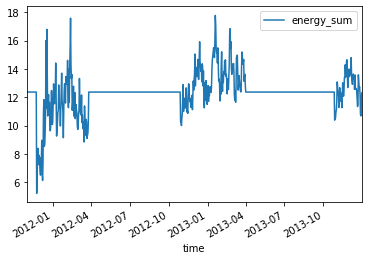

In [251]:
inputs.plot()

I chose the 'energy_sum' column from my dataset to do training as i plan to use the ARIMA Model to fit and train my data, this model only uses one column of input and since we are trying to predict the energy consumption, the 'energy_sum' column is an apropriate choice.
### Part 4.

In [215]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import recall_score
import statsmodels.api as sm

In [275]:
model = ARIMA(x, order=(3,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  792
Model:                     ARMA(3, 0)   Log Likelihood               -1298.654
Method:                       css-mle   S.D. of innovations              1.247
Date:                Wed, 22 Apr 2020   AIC                           2607.308
Time:                        04:47:13   BIC                           2630.680
Sample:                             0   HQIC                          2616.291
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3478      0.076    163.150      0.000      12.199      12.496
ar.L1.y        0.1424      0.035      4.063      0.000       0.074       0.211
ar.L2.y        0.0991      0.035      2.818      0.0

In [295]:
forecast = model_fit.predict(2014)
predicted_mean = np.mean(forecast)
print("The average predicted energy consmption for 2014 is: ", round(predicted_mean,3))

The average predicted energy consmption for 2014 is:  12.348


### Part 5.

In [265]:
test = testing.drop(["Target","temperatureHigh"], axis = 1)

In [273]:
mean_test = np.mean(test['energy_sum'])
mean_test

12.523772329255523

In [291]:
diff = np.abs(predicted_mean - mean_test )
factor = diff / predicted_mean
mape = np.mean(factor)*100
print("The MAPE of the ARIMA Model Classifier is : ", mape)

The MAPE of the ARIMA Model Classifier is :  1.4232520299454314


In [262]:
recall = []

In [263]:
size = int(len(x) * 0.66)

train, test = x[0:size], x[size:len(x)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #rec = round(recall_score(yhat, obs) * 100, 2)
    #recall.append(rec)
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 1.285


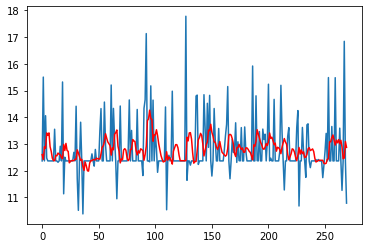

In [264]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()